n = 5000, k = 32
n = 5000, k = 64
n = 5000, k = 256


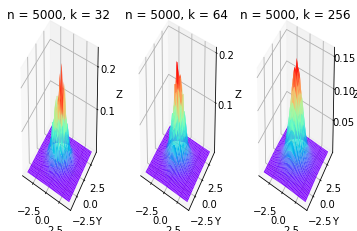

In [8]:
# -*- coding: utf-8 -*-
import math

import numpy as np

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

MU = np.zeros(2)
COV = np.eye(2)

def getData(size):
    data = np.random.multivariate_normal(MU, COV, size)
    return data

def area(data):
    size = 40
    X = []
    for i in range(data.shape[1]):
        x=np.linspace(-4, 4, size)
        X.append(x)
    return np.array(X)

def knn(data, k):
    X = area(data)
    size = [len(X[0]), len(X[1])]
    knnpdf = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            x = np.array([X[0][i],X[1][j]])
            ds = [np.linalg.norm(x-y) for y in data]
            ds.sort()
            v = math.pi*ds[k-1]*ds[k-1]
            if v == 0:
                knnpdf[i,j] = 1
            else:
                knnpdf[i,j] = k/(n*v)
    return X, knnpdf
   
n_set = [5000]
k_set = [32, 64, 256]
fig = plt.figure()
pos = 1

for n in n_set :
    for k in k_set:
        s = "n = %d, k = %d" % (n, k)
        print(s)
        data = getData(n)
        X,P = knn(data, k)
        ax = fig.add_subplot(len(n_set), len(k_set), pos, projection='3d')
        pos = pos + 1
        px, py = np.meshgrid(X[0], X[1])
        ax.plot_surface(px, py, P, cmap='rainbow')
        ax.set_zlabel('Z')
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        ax.set_title(s)
        
plt.savefig("knn_result.png")
plt.show()